<a target="_blank" href="https://colab.research.google.com/github/akramdhaifullah/big-data-analysis/blob/master/oulad/oulad_ml_uts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Importing libraries

In [37]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, TargetEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Data loading and preprocessing

In [2]:
path = "anonymisedData/"
files = os.listdir(path)
print(files)

['assessments.csv', 'courses.csv', 'studentAssessment.csv', 'studentInfo.csv', 'studentRegistration.csv', 'studentVle.csv', 'vle.csv']


In [3]:
std_info = pd.read_csv(path+files[3])
std_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
std_info.duplicated().sum()

0

In [5]:
std_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [6]:
std_info['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [7]:
std_info['imd_band'] = std_info['imd_band'].replace(['10-20'], '10-20%')
std_info['imd_band'].fillna('No band', inplace=True)

In [8]:
std_info['code_module_presentation'] = std_info[['code_module','code_presentation']].agg('-'.join,axis=1)
std_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J


In [9]:
std_info = std_info.astype({'id_student':'string'})
std_info['code_module_presentation_student'] = std_info[['code_module_presentation','id_student']].agg('-'.join,axis=1)
std_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation,code_module_presentation_student
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J,AAA-2013J-11391
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-28400
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J,AAA-2013J-30268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-31604
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J,AAA-2013J-32885


In [10]:
std_info['starting_month'] = std_info['code_presentation'].str[-1:]
std_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation,code_module_presentation_student,starting_month
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J,AAA-2013J-11391,J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-28400,J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J,AAA-2013J-30268,J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-31604,J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J,AAA-2013J-32885,J


In [11]:
courses = pd.read_csv(path+files[1])
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [12]:
courses["code_module_presentation"] = courses[['code_module','code_presentation']].agg('-'.join,axis=1)
courses = courses.drop(columns=['code_module','code_presentation'])
courses.head()

,module_presentation_length,code_module_presentation
0,268,AAA-2013J
1,269,AAA-2014J
2,268,BBB-2013J
3,262,BBB-2014J
4,240,BBB-2013B


In [13]:
courses.isnull().sum()

module_presentation_length    0
code_module_presentation      0
dtype: int64

In [14]:
std_info_merge = pd.merge(std_info, courses, on='code_module_presentation', how='inner')
std_info_merge

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation,code_module_presentation_student,starting_month,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J,AAA-2013J-11391,J,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-28400,J,268
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J,AAA-2013J-30268,J,268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-31604,J,268
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J,AAA-2013J-32885,J,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,GGG-2014J,GGG-2014J-2640965,J,269
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG-2014J,GGG-2014J-2645731,J,269
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG-2014J,GGG-2014J-2648187,J,269
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG-2014J,GGG-2014J-2679821,J,269


In [15]:
std_reg = pd.read_csv(path+files[files.index("studentRegistration.csv")])
std_reg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [16]:
std_reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [17]:
std_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

In [18]:
std_reg['date_unregistration'].describe()

count    10072.000000
mean        49.757645
std         82.460890
min       -365.000000
25%         -2.000000
50%         27.000000
75%        109.000000
max        444.000000
Name: date_unregistration, dtype: float64

In [19]:
std_reg['date_registration'].fillna(0, inplace=True)
std_reg['date_unregistration'].fillna(-366, inplace=True)

In [20]:
std_reg = std_reg.astype({'id_student':'string'})
std_reg["code_module_presentation_student"] = std_reg[['code_module','code_presentation','id_student']].agg('-'.join,axis=1)
std_reg = std_reg.drop(columns=['code_module','code_presentation','id_student'])
std_reg.head()

,date_registration,date_unregistration,code_module_presentation_student
0,-159.0,-366.0,AAA-2013J-11391
1,-53.0,-366.0,AAA-2013J-28400
2,-92.0,12.0,AAA-2013J-30268
3,-52.0,-366.0,AAA-2013J-31604
4,-176.0,-366.0,AAA-2013J-32885


In [21]:
std_info_merge = std_info_merge.merge(std_reg, on='code_module_presentation_student', how='inner')
std_info_merge

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation,code_module_presentation_student,starting_month,module_presentation_length,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J,AAA-2013J-11391,J,268,-159.0,-366.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-28400,J,268,-53.0,-366.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J,AAA-2013J-30268,J,268,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-31604,J,268,-52.0,-366.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J,AAA-2013J-32885,J,268,-176.0,-366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,GGG-2014J,GGG-2014J-2640965,J,269,-4.0,-366.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG-2014J,GGG-2014J-2645731,J,269,-23.0,-366.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG-2014J,GGG-2014J-2648187,J,269,-129.0,-366.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG-2014J,GGG-2014J-2679821,J,269,-49.0,101.0


In [22]:
std_vle = pd.read_csv(path+files[files.index('studentVle.csv')])
std_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [23]:
std_vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [24]:
std_vle.drop(columns=['id_site', 'date'], inplace=True)

In [25]:
std_vle = std_vle.astype({'id_student':'string'})
std_vle["code_module_presentation_student"] = std_vle[['code_module','code_presentation','id_student']].agg('-'.join,axis=1)
std_vle.head()

,code_module,code_presentation,id_student,sum_click,code_module_presentation_student
0,AAA,2013J,28400,4,AAA-2013J-28400
1,AAA,2013J,28400,1,AAA-2013J-28400
2,AAA,2013J,28400,1,AAA-2013J-28400
3,AAA,2013J,28400,11,AAA-2013J-28400
4,AAA,2013J,28400,1,AAA-2013J-28400


In [26]:
sum_click = std_vle[['code_module_presentation_student','sum_click']]
sum_click

,code_module_presentation_student,sum_click
0,AAA-2013J-28400,4
1,AAA-2013J-28400,1
2,AAA-2013J-28400,1
3,AAA-2013J-28400,11
4,AAA-2013J-28400,1
...,...,...
10655275,GGG-2014J-675811,3
10655276,GGG-2014J-675578,1
10655277,GGG-2014J-654064,3
10655278,GGG-2014J-654064,1


In [27]:
sum_click = sum_click.groupby('code_module_presentation_student').sum().reset_index()
sum_click

,code_module_presentation_student,sum_click
0,AAA-2013J-100893,744
1,AAA-2013J-101781,4104
2,AAA-2013J-102806,1944
3,AAA-2013J-102952,1150
4,AAA-2013J-1035023,1896
...,...,...
29223,GGG-2014J-698460,2873
29224,GGG-2014J-698548,598
29225,GGG-2014J-699461,389
29226,GGG-2014J-699628,283


In [28]:
sum_click.isnull().any()

code_module_presentation_student    False
sum_click                           False
dtype: bool

In [29]:
std_info_merge = std_info_merge.merge(sum_click, on="code_module_presentation_student", how="outer")
std_info_merge

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_presentation,code_module_presentation_student,starting_month,module_presentation_length,date_registration,date_unregistration,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-2013J,AAA-2013J-11391,J,268,-159.0,-366.0,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-28400,J,268,-53.0,-366.0,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-2013J,AAA-2013J-30268,J,268,-92.0,12.0,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-2013J,AAA-2013J-31604,J,268,-52.0,-366.0,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-2013J,AAA-2013J-32885,J,268,-176.0,-366.0,1034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,GGG-2014J,GGG-2014J-2640965,J,269,-4.0,-366.0,41.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG-2014J,GGG-2014J-2645731,J,269,-23.0,-366.0,893.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG-2014J,GGG-2014J-2648187,J,269,-129.0,-366.0,312.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG-2014J,GGG-2014J-2679821,J,269,-49.0,101.0,275.0


In [30]:
std_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   code_module                       32593 non-null  object 
 1   code_presentation                 32593 non-null  object 
 2   id_student                        32593 non-null  string 
 3   gender                            32593 non-null  object 
 4   region                            32593 non-null  object 
 5   highest_education                 32593 non-null  object 
 6   imd_band                          32593 non-null  object 
 7   age_band                          32593 non-null  object 
 8   num_of_prev_attempts              32593 non-null  int64  
 9   studied_credits                   32593 non-null  int64  
 10  disability                        32593 non-null  object 
 11  final_result                      32593 non-null  object 
 12  code

In [31]:
cols_to_drop = ['code_presentation','id_student','code_module_presentation','code_module_presentation_student']
std_info_merge.drop(cols_to_drop, axis=1, inplace=True)

In [32]:
std_info_merge.isnull().any()

code_module                   False
gender                        False
region                        False
highest_education             False
imd_band                      False
age_band                      False
num_of_prev_attempts          False
studied_credits               False
disability                    False
final_result                  False
starting_month                False
module_presentation_length    False
date_registration             False
date_unregistration           False
sum_click                      True
dtype: bool

In [33]:
std_info_merge['sum_click'].fillna(0, inplace=True)

## Checking for data imbalance

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64
Proportions: [1.22, 1.75, 4.09, 1.44, 3.36, 2.33]


C:\Users\Akram\AppData\Local\Temp\ipykernel_20080\1295335033.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proportion = [target_count[i] / target_count[j] for i in range(3) for j in range(i+1, 4)]


<Axes: title={'center': 'Count (target)'}, xlabel='final_result'>

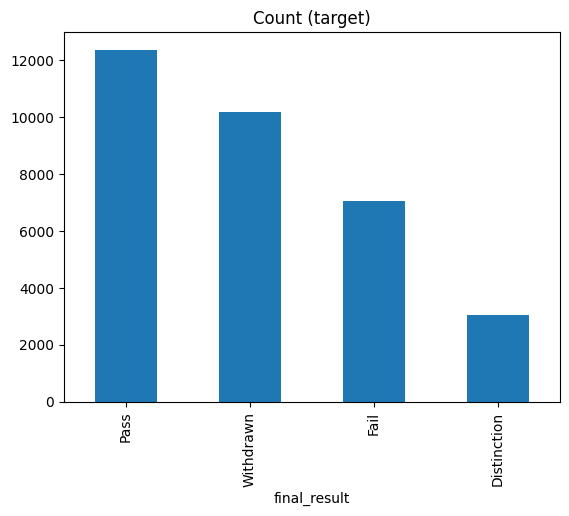

In [43]:
target_count = std_info_merge['final_result'].value_counts()
print(target_count)
proportion = [target_count[i] / target_count[j] for i in range(3) for j in range(i+1, 4)]
print('Proportions:', [round(p, 2) for p in proportion])

target_count.plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Proportion of Classes'}, ylabel='count'>

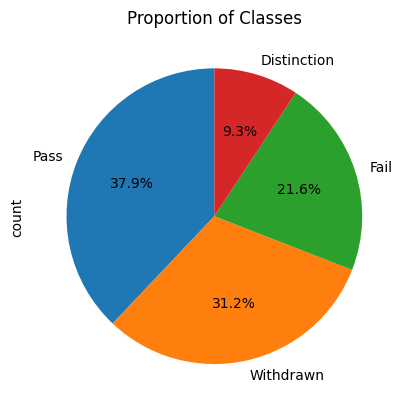

In [45]:
target_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Proportion of Classes')

In [7]:
std_info = std_info.astype({'id_student':'string'})
std_info['code_module_student'] = std_info[['code_module','id_student']].agg('-'.join, axis=1)
std_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_student
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA-11391
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA-28400
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA-30268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA-31604
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA-32885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,GGG-2640965
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG-2645731
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG-2648187
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG-2679821


In [14]:
ass = pd.read_csv(path+files[0])
ass

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [16]:
ass.drop('code_presentation', axis=1, inplace=True)

In [17]:
std_ass = pd.read_csv(path+files[2])
std_ass

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [18]:
std_ass.duplicated().sum()

0

In [19]:
std_ass.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [20]:
std_ass['score'].fillna(0, inplace=True)

In [22]:
ass_merge = ass.merge(std_ass, on='id_assessment', how='inner')
ass_merge

,code_module,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...
173907,GGG,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,37437,TMA,173.0,0.0,653252,171,0,70.0


In [26]:
ass_merge = ass_merge.astype({'id_student':'string'})
ass_merge['code_module_student'] = ass_merge[['code_module','id_student']].agg('-'.join, axis=1)
ass_merge

,code_module,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,code_module_student
0,AAA,1752,TMA,19.0,10.0,11391,18,0,78.0,AAA-11391
1,AAA,1752,TMA,19.0,10.0,28400,22,0,70.0,AAA-28400
2,AAA,1752,TMA,19.0,10.0,31604,17,0,72.0,AAA-31604
3,AAA,1752,TMA,19.0,10.0,32885,26,0,69.0,AAA-32885
4,AAA,1752,TMA,19.0,10.0,38053,19,0,79.0,AAA-38053
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,37437,TMA,173.0,0.0,652462,172,0,60.0,GGG-652462
173908,GGG,37437,TMA,173.0,0.0,652539,176,0,75.0,GGG-652539
173909,GGG,37437,TMA,173.0,0.0,653157,187,0,70.0,GGG-653157
173910,GGG,37437,TMA,173.0,0.0,653252,171,0,70.0,GGG-653252


In [13]:
std_ass['score_mark'] = std_ass['score'].apply(lambda x: 'fail' if x < 40 else 'pass')
std_ass

,id_assessment,id_student,date_submitted,is_banked,score,score_mark
0,1752,11391,18,0,78.0,pass
1,1752,28400,22,0,70.0,pass
2,1752,31604,17,0,72.0,pass
3,1752,32885,26,0,69.0,pass
4,1752,38053,19,0,79.0,pass
...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,pass
173908,37443,534672,229,0,100.0,pass
173909,37443,546286,215,0,80.0,pass
173910,37443,546724,230,0,100.0,pass


In [23]:
# Group by 'id_student' and count 'Pass' and 'Fail' scores
std_ass_grouped = std_ass.groupby(['id_student', 'score_mark']).size().unstack(fill_value=0).reset_index()
std_ass_grouped

score_mark,id_student,fail,pass
0,6516,0,5
1,8462,0,7
2,11391,0,5
3,23629,0,4
4,23698,0,9
...,...,...,...
23364,2698251,1,6
23365,2698257,0,5
23366,2698535,4,4
23367,2698577,0,5


In [24]:
std_info_merge = pd.merge(std_info, std_ass_grouped, on='id_student')
std_info_merge

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,fail,pass
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,5
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,5
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,5
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2,3
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26741,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,0,9
26742,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0,9
26743,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,0,9
26744,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0,2


# Data splitting, encoding, normalization

In [35]:
X = std_info_merge.drop(['final_result'], axis=1)
y = std_info_merge['final_result']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32593 non-null  object 
 1   gender                      32593 non-null  object 
 2   region                      32593 non-null  object 
 3   highest_education           32593 non-null  object 
 4   imd_band                    32593 non-null  object 
 5   age_band                    32593 non-null  object 
 6   num_of_prev_attempts        32593 non-null  int64  
 7   studied_credits             32593 non-null  int64  
 8   disability                  32593 non-null  object 
 9   starting_month              32593 non-null  object 
 10  module_presentation_length  32593 non-null  int64  
 11  date_registration           32593 non-null  float64
 12  date_unregistration         32593 non-null  float64
 13  sum_click                   325

In [38]:
cols_to_encode = ['code_module','gender','region','highest_education','imd_band','age_band','disability','starting_month']

encoder = LabelEncoder()

X_encoded = X

for feature in X:
    if feature in cols_to_encode:
        X_encoded[feature] = encoder.fit_transform(X[feature])

In [39]:
X_encoded

,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,starting_month,module_presentation_length,date_registration,date_unregistration,sum_click
0,0,1,0,1,9,2,0,240,0,1,268,-159.0,-366.0,934.0
1,0,0,6,1,2,1,0,60,0,1,268,-53.0,-366.0,1435.0
2,0,0,5,0,3,1,0,60,1,1,268,-92.0,12.0,281.0
3,0,0,7,0,5,1,0,60,0,1,268,-52.0,-366.0,2158.0
4,0,0,11,2,5,0,0,60,0,1,268,-176.0,-366.0,1034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,0,10,2,1,0,0,30,0,1,269,-4.0,-366.0,41.0
32589,6,0,0,2,4,1,0,30,0,1,269,-23.0,-366.0,893.0
32590,6,0,8,0,2,0,0,30,1,1,269,-129.0,-366.0,312.0
32591,6,0,7,2,9,1,0,30,0,1,269,-49.0,101.0,275.0


In [40]:
y.unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [41]:
y = encoder.fit_transform(y)
pd.Series(y).unique()

array([2, 3, 1, 0])

In [42]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

## Data balancing with SMOTE()

In [53]:
oversample = SMOTE()

X_sampled, y_sampled = oversample.fit_resample(X_scaled, y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.1, random_state=42)

# Model training

In [55]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = clf.predict(X_test)

# Model evaluation

In [57]:
acc_score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy:\n{acc_score}\n\n{clf_report}\nConfusion matrix:\n{conf_mat}")

Accuracy:
0.8485338725985845

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1278
           1       0.83      0.79      0.81      1211
           2       0.71      0.77      0.74      1235
           3       1.00      0.99      1.00      1221

    accuracy                           0.85      4945
   macro avg       0.85      0.85      0.85      4945
weighted avg       0.85      0.85      0.85      4945

Confusion matrix:
[[1076   27  175    0]
 [  53  953  204    1]
 [ 113  168  954    0]
 [   0    6    2 1213]]


### Hyperparameter tuning with RandomizedSearch

In [58]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
clf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B589C792E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B58CBF7F40>})

In [59]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 114}


In [60]:
clf = RandomForestClassifier(max_depth=19, n_estimators=114)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_estimators=114)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
acc_score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy:\n{acc_score}\n\n{clf_report}\nConfusion matrix:\n{conf_mat}")

Accuracy:
0.8390293225480283

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1278
           1       0.83      0.76      0.79      1211
           2       0.70      0.76      0.73      1235
           3       1.00      0.99      1.00      1221

    accuracy                           0.84      4945
   macro avg       0.84      0.84      0.84      4945
weighted avg       0.84      0.84      0.84      4945

Confusion matrix:
[[1081   29  168    0]
 [  53  916  241    1]
 [ 148  148  939    0]
 [   0    6    2 1213]]
